<a href="https://colab.research.google.com/github/azdinelaaouissi/ML/blob/main/banque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas  as  pd
import  numpy  as  np
import  seaborn as sns
import  matplotlib.pyplot as plt
import  warnings

from  sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report,confusion_matrix
import plotly.express as px
from   sklearn.preprocessing  import  LabelEncoder, OneHotEncoder, StandardScaler

warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("bank-full.csv",delimiter=";")

In [4]:
label_encoder=LabelEncoder()
df.y=label_encoder.fit_transform(df.y)


In [5]:
for  col  in  ["default","housing","loan"]:
    df[col]=label_encoder.fit_transform(df[col])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
df_encoded = pd.get_dummies(df, columns=['job', 'education',"marital","contact","poutcome"])


In [13]:
df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,False,True,False,False,False,True,False,False,False,True
1,44,0,29,1,0,5,5,151,1,-1,...,False,False,True,False,False,True,False,False,False,True
2,33,0,2,1,1,5,5,76,1,-1,...,False,True,False,False,False,True,False,False,False,True
3,47,0,1506,1,0,5,5,92,1,-1,...,False,True,False,False,False,True,False,False,False,True
4,33,0,1,0,0,5,5,198,1,-1,...,False,False,True,False,False,True,False,False,False,True


In [12]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df_encoded['month']=df_encoded["month"].replace(month_mapping).astype(int)

In [14]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'duration','month', 'campaign', 'pdays', 'previous']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [15]:
df_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,-0.475354,0.011016,-0.569351,-0.411453,...,False,True,False,False,False,True,False,False,False,True
1,0.288529,0,-0.437895,1,0,-1.298476,-0.475354,-0.416127,-0.569351,-0.411453,...,False,False,True,False,False,True,False,False,False,True
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.475354,-0.707361,-0.569351,-0.411453,...,False,True,False,False,False,True,False,False,False,True
3,0.571051,0,0.047205,1,0,-1.298476,-0.475354,-0.645231,-0.569351,-0.411453,...,False,True,False,False,False,True,False,False,False,True
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.475354,-0.233620,-0.569351,-0.411453,...,False,False,True,False,False,True,False,False,False,True


In [16]:
X=df_encoded.drop("y",axis=1)
y=df_encoded["y"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
model  =LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Précision du modèle : 0.8977109366360722
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

Mean Squared Error : 0.1022890633639279


<Axes: >

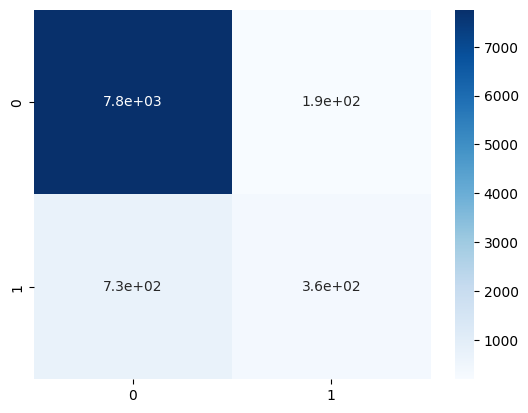

In [25]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Précision du modèle : {accuracy}")

# Afficher un rapport de classification détaillé
print(classification_report(y_test, y_pred))

mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse}")

# Générer et afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix ,annot=True,cmap="Blues")